## Developing a model for predicting f1 score for `standing`

**From given dataset we have to build model for cow standing activities which can predict better f1 score**

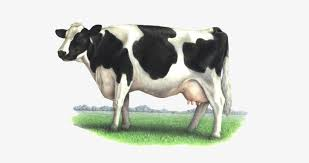

In [35]:
Image("images.png",width=500,
    height=100)

In [32]:
#Importing tools we need
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

In [6]:
#Importing dataset
df = pd.read_csv("S4_train.csv")

In [7]:
df.head()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,1628308150,0.209961,0.943359,0.138672,-6.591797,-6.530762,-2.258301,-174.0,1429.5,432.0,4
1,1628308150,0.210449,0.947266,0.158203,-6.896973,-3.479004,-2.197266,-172.5,1429.5,414.0,4
2,1628308150,0.214356,0.948242,0.173828,-3.845215,-0.488281,-3.662109,-163.5,1434.0,414.0,4
3,1628308150,0.200684,0.950684,0.158691,0.854492,1.220703,-3.295898,-183.0,1428.0,414.0,4
4,1628308150,0.183106,0.943359,0.146973,0.915527,0.488281,-4.333496,-162.0,1416.0,421.5,4


In [8]:
df.dtypes

time       int64
acc_x    float64
acc_y    float64
acc_z    float64
gyr_x    float64
gyr_y    float64
gyr_z    float64
mag_x    float64
mag_y    float64
mag_z    float64
label      int64
dtype: object

In [9]:
len(df)

2539806

In [10]:
df["label"].value_counts()

4    2539806
Name: label, dtype: int64

In [11]:
df.describe()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
count,2.539806e+06,2.539806e+06,2.539806e+06,2.539806e+06,2.539806e+06,2.539806e+06,2.539806e+06,2.539806e+06,2.539806e+06,2.539806e+06,2539806.0
mean,1.628321e+09,-5.732140e-02,5.482271e-01,1.423320e-01,8.225516e-01,-1.966107e+00,-6.863351e-01,-2.185851e+02,3.375701e+02,2.180714e+02,4.0
std,8.162702e+04,2.414833e-01,7.797225e-01,1.599196e-01,1.612364e+01,2.736575e+01,1.291417e+01,2.405244e+02,6.006150e+02,4.321937e+02,0.0
min,1.628070e+09,-1.151172e+01,-1.314160e+01,-1.598340e+01,-1.902039e+03,-1.986816e+03,-1.860107e+03,-1.152000e+03,-7.665000e+02,-1.150500e+03,4.0
25%,1.628318e+09,-2.041016e-01,8.007813e-01,7.958980e-02,-1.708984e+00,-7.263184e+00,-2.807617e+00,-3.975000e+02,-1.455000e+02,1.185000e+02,4.0
50%,1.628335e+09,-5.566410e-02,9.462891e-01,1.425781e-01,8.544922e-01,-2.075195e+00,-6.713868e-01,-1.980000e+02,9.750000e+01,3.345000e+02,4.0
75%,1.628343e+09,8.007810e-02,9.775391e-01,2.124024e-01,3.295898e+00,2.929688e+00,1.586914e+00,-6.150000e+01,9.645000e+02,5.430000e+02,4.0
max,1.628404e+09,5.737305e+00,7.085449e+00,1.599854e+01,1.902710e+03,1.859924e+03,1.523376e+03,7.920000e+02,1.558500e+03,1.147500e+03,4.0


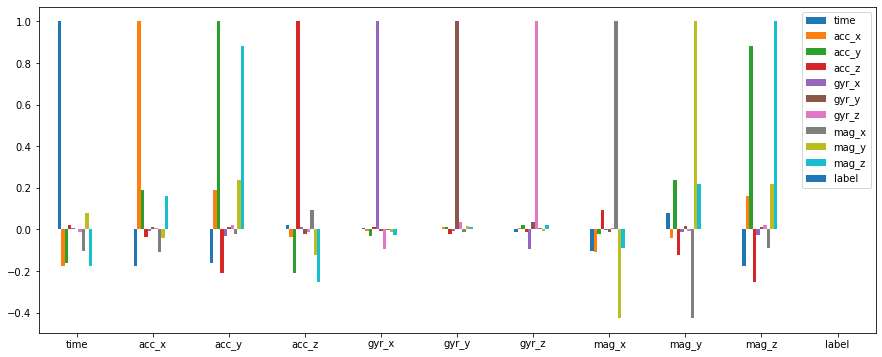

In [12]:
df.corr().plot(kind="bar",
              figsize=(15,6))
plt.xticks(rotation=0);

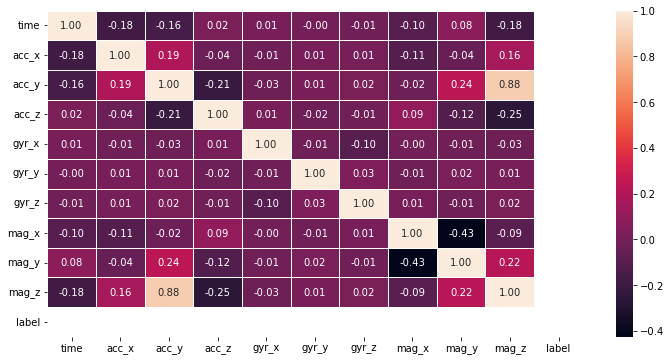

In [13]:
corr_mat=df.corr()
fig,ax = plt.subplots(figsize=(12,6))
ax = sns.heatmap(corr_mat,
                annot=True,
                linewidths=0.5,
                fmt=".2f")

In [14]:
#Importing train_test_split from sklearn model selaction 
from sklearn.model_selection import train_test_split

#Creating X & y labels
X = df.drop("label",axis=1)
y = df["label"]

#Spliting data into training ad testing 
X_train , X_test , y_train ,y_test = train_test_split(X, y , test_size=0.2)

In [15]:
X_train


,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
474995,1628307495,0.303711,-0.774902,0.330566,-0.915527,49.743652,-30.456543,-472.5,51.0,-409.5
2393362,1628335201,0.190430,1.000976,-0.069336,1.098633,-2.014160,1.770020,-546.0,1084.5,358.5
2388475,1628335088,0.126465,0.983398,0.029297,1.098633,-1.708984,-0.610352,-480.0,1053.0,345.0
1709964,1628393054,0.086914,0.975586,0.142578,1.586914,-6.408691,0.671387,-151.5,-226.5,276.0
524807,1628317187,-0.640137,-0.702637,0.287109,6.225586,0.732422,-3.051758,-87.0,60.0,-420.0
...,...,...,...,...,...,...,...,...,...,...
440031,1628392770,0.408691,0.797852,0.257324,-4.150391,44.250488,-4.760742,-382.5,1384.5,451.5
2079179,1628341546,0.018066,0.972168,0.101562,-0.183106,-8.605957,-0.183106,-520.5,126.0,699.0
188641,1628334989,-0.125000,0.981445,0.071777,-1.525879,17.333984,-0.122070,-12.0,1357.5,388.5
2412832,1628337243,-0.411621,1.019043,-0.169434,-13.549805,-47.973633,-14.160156,-685.5,909.0,907.5


In [16]:
X_test

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
318547,1628341223,-0.187988,0.972168,0.129883,0.915527,-1.403809,-0.122070,-435.0,1417.5,574.5
1950446,1628337367,-0.801270,0.549316,0.334961,0.671387,-27.099609,17.578125,-31.5,-27.0,496.5
1197485,1628310557,0.056152,0.788574,0.254883,-28.442383,-8.422852,-5.676270,285.0,-165.0,415.5
140539,1628333139,-0.069336,0.881348,0.462402,-1.342773,-7.202148,-1.953125,-111.0,1251.0,133.5
2155587,1628392811,-0.008301,0.952637,0.171387,4.394531,2.319336,-0.610352,-180.0,123.0,342.0
...,...,...,...,...,...,...,...,...,...,...
638995,1628331963,0.070801,-1.004883,0.250000,-1.464844,-3.356934,-15.380859,-177.0,88.5,-667.5
2014217,1628338892,0.069336,0.982422,0.185059,-6.042480,-11.230469,-24.597168,-754.5,124.5,477.0
1662635,1628391846,-0.099121,0.968262,-0.006348,-0.610352,-3.417969,-0.549316,-121.5,-183.0,241.5
481390,1628307745,-0.174316,-1.073242,0.100098,-3.234863,-16.662598,2.624512,-331.5,25.5,-498.0


In [17]:
y_train

474995     4
2393362    4
2388475    4
1709964    4
524807     4
          ..
440031     4
2079179    4
188641     4
2412832    4
572435     4
Name: label, Length: 2031844, dtype: int64

In [18]:
y_train

474995     4
2393362    4
2388475    4
1709964    4
524807     4
          ..
440031     4
2079179    4
188641     4
2412832    4
572435     4
Name: label, Length: 2031844, dtype: int64

In [19]:
#Importing RandomForestRegresor from sklearn ensamble
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()

In [20]:
#Fitting model into X & y train and test
clf.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
clf.fit(X_test, y_test)

RandomForestRegressor()

In [22]:
#Fitting model X & y into scoring 
clf.score(X_train,y_train)

1.0

In [23]:
clf.score(X_test,y_test)

1.0

In [24]:
y_pred = clf.predict(X_test)

In [25]:
y_pred

array([4., 4., 4., ..., 4., 4., 4.])

In [26]:
#Importing classification reports from sklearn metrics
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           4       1.00      1.00      1.00    507962

    accuracy                           1.00    507962
   macro avg       1.00      1.00      1.00    507962
weighted avg       1.00      1.00      1.00    507962



In [28]:
#From sklearn.metrics importing f1 score
from sklearn.metrics import f1_score

In [29]:
f1=f1_score(y_test,y_pred,average="weighted")

In [30]:
f1

1.0